# Arabic News Articles

Prepared by: Alanoud Alosaimi & Mashael Alfehaid

* Import libraries 
* Read the data from the Database
* Embedding:
    - Count Vectorizer
    - TF-IDF Vectorizer

* Topic Modelling:
    - Latent Dirichlet Allocation (LDA)
        - Count Vectorizer
        - TF-IDF Vectorizer
    - Latent Semantic Analysis (LSA)
        - Count Vectorizer
        - TF-IDF Vectorizer
    - Non-Negative Matrix Factorization (NMF)
        - Count Vectorizer
        - TF-IDF Vectorizer
    - CorEx
        - Count Vectorizer
        - TF-IDF Vectorizer
    - CorEx with Anchors 
        - TF-IDF Vectorizer
        
* Topics prediction
* Topic probability

## Import libraries

In [1]:
import numpy as np
import pandas as pd 
import sqlite3 as sql
import seaborn as sns
from nltk import FreqDist
import scipy.sparse as ss
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from corextopic import corextopic as ct
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora, models, similarities, matutils

%matplotlib inline

/Applications/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## Load the dataset

In [5]:
DB_connection = sql.connect('PreprocessedData.db')
df = pd.read_sql('SELECT * FROM Preprocessed_data', DB_connection)

In [7]:
df = df.drop(df[['field1','author']],axis=1)

In [8]:
df

,content
0,"['حد', 'رييس', 'وزراء', 'بريطان', 'ديفيد', 'كا..."
1,"['اصدر', 'رييس', 'عبدرب', 'منصور', 'هاد', 'ريي..."
2,"['وافق', 'امن', 'اثن', 'اتفاق', 'يحد', 'رنامج'..."
3,"['مسوول', 'افغان', 'جندي', 'افغاني', 'قتل', 'ح..."
4,"['اعلن', 'خارجيه', 'ايطاليه', 'اثن', 'اربع', '..."
...,...
25612,"['شار', 'تويتر', 'يسب', 'جوجل', 'بلس', 'اكتب',..."
25613,"['شار', 'تويتر', 'يسب', 'جوجل', 'بلس', 'اكتب',..."
25614,"['شار', 'تويتر', 'يسب', 'جوجل', 'بلس', 'اكتب',..."
25615,"['شار', 'تويتر', 'يسب', 'جوجل', 'بلس', 'اكتب',..."


## Topic modeling

### CountVectorizer

In [9]:
cv1 = CountVectorizer()
X_CountVectorizer= cv1.fit_transform(df['content'])

df_CountVectorizer=pd.DataFrame(X_CountVectorizer.toarray(), columns=cv1.get_feature_names())
df_CountVectorizer

,ءل,اء,اال,اب,ابا,اباء,اباءوتقول,اباءويمك,اباءيريد,اباب,...,یرید,یسع,یشرف,یظهر,یعتمد,یعن,یعیش,یقدم,یلقب,یمن
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_CountVectorizer.shape

(25617, 122040)

### TF-IDF Vectorizer

In [11]:
tfidf = TfidfVectorizer()

X_TfidfVectorizer= tfidf.fit_transform(df['content'])
df_TfidfVectorizer=pd.DataFrame(X_TfidfVectorizer.toarray(),columns=tfidf.get_feature_names())
df_TfidfVectorizer

,ءل,اء,اال,اب,ابا,اباء,اباءوتقول,اباءويمك,اباءيريد,اباب,...,یرید,یسع,یشرف,یظهر,یعتمد,یعن,یعیش,یقدم,یلقب,یمن
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_TfidfVectorizer.shape

(25617, 122040)

### Latent Dirichlet Allocation

#### CountVectorizer

In [13]:
## Latent Dirichlet Allocation for CountVectorizer

corpus = matutils.Sparse2Corpus(X_CountVectorizer)
id2word = dict((v, k) for k, v in cv1.vocabulary_.items())
ldaـCV = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=5)
ldaـCV.print_topics()

[(0,
  '0.005*"تشفين" + 0.005*"بلديهاوضح" + 0.004*"تصريحاتوتظل" + 0.004*"تلعب" + 0.004*"باثبا" + 0.004*"تشفع" + 0.004*"ترامس" + 0.004*"استشيط" + 0.004*"املس" + 0.004*"اوليوفقا"'),
 (1,
  '0.003*"اخريويحظ" + 0.003*"الغز" + 0.003*"تصدقفقد" + 0.002*"تناج" + 0.002*"اخريويجلد" + 0.002*"اخريوير" + 0.002*"تفو" + 0.002*"تانق" + 0.002*"ايذاء" + 0.002*"اهدر"'),
 (2,
  '0.003*"بلع" + 0.003*"انسج" + 0.002*"احرف" + 0.002*"ابوشوش" + 0.002*"ابورديس" + 0.002*"ابورقهم" + 0.002*"اذي" + 0.002*"بحرواد" + 0.002*"ادالفيف" + 0.001*"اعبوف"'),
 (3,
  '0.007*"اميركيورغم" + 0.003*"الال" + 0.003*"باركل" + 0.002*"اسيامحط" + 0.002*"بام" + 0.002*"تراتفورد" + 0.002*"تحتيهواثار" + 0.002*"تعويضاتومع" + 0.002*"توستال" + 0.002*"بوسنه"'),
 (4,
  '0.004*"انمصدر" + 0.002*"اكسماكس" + 0.002*"ارتواز" + 0.002*"اسطبلا" + 0.002*"بوليكربون" + 0.002*"انتيغ" + 0.002*"اخبث" + 0.002*"تضافر" + 0.002*"تعيش" + 0.002*"اذربيجانوبجانب"'),
 (5,
  '0.010*"انسانيهوف" + 0.006*"استفاق" + 0.004*"ابوروجينز" + 0.003*"ابوريج" + 0.003*"بلوبنيزيه" + 0

In [14]:
for topic in ldaـCV.show_topics(num_topics=10, formatted=False, num_words=20):
    print("Topic {}: ".format(topic[0]))
    topicwords = [w for (w, val) in topic[1]]
    print(topicwords)

Topic 0: 
['تشفين', 'بلديهاوضح', 'تصريحاتوتظل', 'تلعب', 'باثبا', 'تشفع', 'ترامس', 'استشيط', 'املس', 'اوليوفقا', 'اشاد', 'ادخال', 'تعبيرهواضاف', 'استشير', 'اشارهوتعمل', 'تعليمواهاب', 'تغرر', 'انش', 'امسوحسب', 'اوليوقال']
Topic 1: 
['اخريويحظ', 'الغز', 'تصدقفقد', 'تناج', 'اخريويجلد', 'اخريوير', 'تفو', 'تانق', 'ايذاء', 'اهدر', 'اخرينوير', 'اخرينويذكر', 'تنيب', 'بارحه', 'تهمين', 'افريقياويقوم', 'تفكيرهتشد', 'اقليميهوجاء', 'تانج', 'بداييفالحاله']
Topic 2: 
['بلع', 'انسج', 'احرف', 'ابوشوش', 'ابورديس', 'ابورقهم', 'اذي', 'بحرواد', 'ادالفيف', 'اعبوف', 'بلدوبحسب', 'اكزيما', 'باعراض', 'بساطهاحيانا', 'تموزوانخفض', 'ابوزاهر', 'اتجول', 'بشوش', 'بالحن', 'تعويق']
Topic 3: 
['اميركيورغم', 'الال', 'باركل', 'اسيامحط', 'بام', 'تراتفورد', 'تحتيهواثار', 'تعويضاتومع', 'توستال', 'بوسنه', 'ترسب', 'بانضباطي', 'تحكمواف', 'باوساط', 'تبصق', 'تامفليو', 'تجهد', 'تركيام', 'تاريخياواضاف', 'بيولوج']
Topic 4: 
['انمصدر', 'اكسماكس', 'ارتواز', 'اسطبلا', 'بوليكربون', 'انتيغ', 'اخبث', 'تضافر', 'تعيش', 'اذربيجانوبجانب', 'توا

#### TF-IDF

In [15]:
## Latent Dirichlet Allocation for TF-IDF Vectorizer

corpus = matutils.Sparse2Corpus(X_TfidfVectorizer)
id2word = dict((v, k) for k, v in tfidf.vocabulary_.items())
lda_TF = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=5)
lda_TF.print_topics()

[(0,
  '0.002*"انتيغ" + 0.001*"اسطبلا" + 0.001*"تشفع" + 0.001*"تشفين" + 0.001*"تصريحاتوتظل" + 0.001*"ادنی" + 0.001*"تعليمواهاب" + 0.001*"اوليوفقا" + 0.001*"تعبيرهواضاف" + 0.001*"تصطحب"'),
 (1,
  '0.001*"باتنا" + 0.001*"اوكار" + 0.001*"انبار" + 0.001*"بايبول" + 0.001*"باشينو" + 0.001*"تحاصر" + 0.001*"اميركاوالتداول" + 0.001*"البص" + 0.001*"العج" + 0.001*"الغ"'),
 (2,
  '0.005*"الال" + 0.003*"استخفاف" + 0.003*"استجمامي" + 0.003*"ادوراد" + 0.003*"ارتداد" + 0.003*"استاد" + 0.003*"اتفاقوامام" + 0.003*"اراضويعد" + 0.003*"اجازهواذا" + 0.003*"ارجيال"'),
 (3,
  '0.001*"تنورهفيم" + 0.001*"تلاعب" + 0.001*"تمور" + 0.000*"تاهيلاما" + 0.000*"تثبيث" + 0.000*"تحرض" + 0.000*"اصابهبينما" + 0.000*"اصطياف" + 0.000*"اصفاء" + 0.000*"اطوار"'),
 (4,
  '0.001*"ايحب" + 0.001*"اسماكالشيخ" + 0.001*"ارتشف" + 0.001*"استراتيجيوك" + 0.001*"استعراضيهاثبت" + 0.001*"اسبانيواذا" + 0.001*"اسكوتلنديه" + 0.001*"اولولم" + 0.001*"استفهاما" + 0.001*"اسحاب"'),
 (5,
  '0.002*"افلاج" + 0.002*"تيردا" + 0.001*"باقتحامهواوضح" + 0.00

In [16]:
for topic in lda_TF.show_topics(num_topics=10, formatted=False, num_words=20):
    print("Topic {}: ".format(topic[0]))
    topicwords = [w for (w, val) in topic[1]]
    print(topicwords)

Topic 0: 
['انتيغ', 'اسطبلا', 'تشفع', 'تشفين', 'تصريحاتوتظل', 'ادنی', 'تعليمواهاب', 'اوليوفقا', 'تعبيرهواضاف', 'تصطحب', 'ترامس', 'استشيط', 'تصنيفا', 'بلديهاوضح', 'تشيدوخيل', 'تتوفر', 'استغفال', 'تغیر', 'باثبا', 'ترفيهيهوك']
Topic 1: 
['باتنا', 'اوكار', 'انبار', 'بايبول', 'باشينو', 'تحاصر', 'اميركاوالتداول', 'الغ', 'العج', 'البص', 'اكسوارا', 'ايامواوضحت', 'ثرواتويوكد', 'تخطو', 'بامواج', 'اليوقال', 'باضاءا', 'امداد', 'تجسيدا', 'اعر']
Topic 2: 
['الال', 'استخفاف', 'استجمامي', 'ادوراد', 'ارتداد', 'استاد', 'اتفاقوامام', 'اراضويعد', 'اجازهواذا', 'ارجيال', 'التز', 'احسانيقولها', 'العد', 'الغل', 'اقلوسيقص', 'اغتصاب', 'امتيازبرنامج', 'امرهل', 'اقتصايه', 'تشترك']
Topic 3: 
['تنورهفيم', 'تلاعب', 'تمور', 'تاهيلاما', 'تثبيث', 'تحرض', 'اصابهبينما', 'اصطياف', 'اصفاء', 'اطوار', 'اسماوهموقال', 'اديب', 'اسكتلند', 'تنظيمالاقتصاديه', 'اساءه', 'افخم', 'تشابكيه', 'تردان', 'تاجيلواضاف', 'تاو']
Topic 4: 
['ايحب', 'اسماكالشيخ', 'ارتشف', 'استراتيجيوك', 'استعراضيهاثبت', 'اسبانيواذا', 'اسكوتلنديه', 'اولولم', 'است

### Latent Semantic Analysis (LSA) 

#### CountVectorizer

In [17]:
## Latent Semantic Analysis for CountVectorizer

lsa = TruncatedSVD(10)
doc_topic = lsa.fit_transform(X_CountVectorizer)

In [18]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [19]:
display_topics(lsa, cv1.get_feature_names(), 20)


Topic  0
رييس, مايه, ايران, ملك, امن, دور, عمل, سوق, اسعار, تنظيم, طريق, نظام, ارهاب, مشروع, مصر, اتفاق, دعم, سعر, اقتصاد, داعش

Topic  1
مايه, سعر, سهم, واقع, تراجع, اسعار, سوق, قيم, صول, تلا, اسهم, نسب, موشر, مقابل, تداول, نفط, قطاع, ارتفاع, مليار, ارتفع

Topic  2
حوث, ايران, مقاومه, قوا, يمن, داعش, امن, تنظيم, ارهاب, عدن, سهم, محافظ, تحالف, قتل, سعر, مايه, عسكر, جيش, واقع, شعبيه

Topic  3
ايران, نفط, اتفاق, اسعار, اقتصاد, النو, طاقه, انتاج, سوق, ايرانيه, ولا, مليار, نمو, امريك, سياس, نظام, طهران, عقوب, انخفاض, اميرك

Topic  4
اسعار, ملك, مشروع, سوق, نفط, محافظ, اقتصاد, حوث, طاقه, طريق, عقار, مقاومه, مشاريع, تنفيذ, تعليم, نمو, اعمال, تطوير, قطاع, مدن

Topic  5
ملك, رييس, وزراء, ايران, مصر, عهد, نايب, عزيز, امن, مشروع, سهم, اتفاق, واقع, سمو, تعين, عضو, سعر, خارجيه, معال, ارهاب

Topic  6
رييس, ملك, حوث, يمن, ايران, مقاومه, عدن, اتفاق, محافظ, نفط, اسعار, ناد, فريق, شعبيه, اتحاد, وزراء, اعب, تحالف, تعز, نايب

Topic  7
رييس, تنظيم, داعش, نفط, اسعار, ارهاب, وزراء, امن, مصر, تركي, اتحاد, ف

#### TF-IDF 

In [20]:
## Latent Semantic Analysis for TF-IDF Vectorizer

lsa = TruncatedSVD(10)
doc_topic = lsa.fit_transform(X_TfidfVectorizer)

In [21]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [22]:
display_topics(lsa, tfidf.get_feature_names(), 20)


Topic  0
رييس, ناد, ملك, فريق, امن, يمن, ايران, اعب, اتحاد, دور, مصر, محافظ, قدم, ارهاب, رياض, عيد, تنظيم, عمل, اتفاق, لاعب

Topic  1
ناد, فريق, اعب, لاعب, معسكر, مدرب, اتحاد, موسم, ريق, قدم, لكر, ملعب, هلال, مبار, كاس, مباراه, تدريبا, الفن, كره, نصر

Topic  2
مايه, اسعار, سوق, نفط, اسهم, تراجع, مليار, موشر, ميه, اقتصاد, دولار, سعر, سهم, ارتفاع, بلغ, انخفاض, نمو, قيم, ربع, خام

Topic  3
حوث, مقاومه, ايران, عدن, يمن, تحالف, اتفاق, قوا, داعش, نفط, مايه, اسعار, قتل, تراجع, اعب, جيش, مقاتل, حزب, تركي, شعبيه

Topic  4
يمن, حوث, عدن, مقاومه, محافظ, شعبيه, مايه, ملك, يمنيه, اسهم, سوق, اسعار, مطار, لاغاث, انسانيه, تراجع, سهم, موشر, والاعمال, تعز

Topic  5
ملك, ايران, مصر, يمن, اتفاق, عهد, رييس, نايب, وزراء, لاغاث, معال, النو, خارجيه, سمو, انسانيه, والاعمال, شقيق, مساعد, دفاع, لرييس

Topic  6
امن, ارهاب, ملك, طوار, مسجد, تفجير, سمو, شهداء, مايه, اسهم, مصاب, قوا, حادث, تراجع, عهد, ميه, موشر, نايب, داعش, فريق

Topic  7
بلديه, انتخابيه, انتخاب, تعليم, مرشح, ناخب, لانتخابا, جنه, مراكز, قيد, مجالس,

### Non-Negative Matrix Factorization 

#### CountVectorizer

In [23]:
## Non-Negative Matrix Factorization for CountVectorizer

nmf_CV = NMF(10)
doc_topic1 = nmf_CV.fit_transform(X_CountVectorizer)
nmf_features = nmf_CV.transform(X_CountVectorizer)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [24]:
nmf_topic_CV= display_topics(nmf_CV, cv1.get_feature_names(), 20)


Topic  0
عيد, نفس, كتاب, بعض, دور, بين, يوسف, غير, دين, عمر, شخص, صور, كان, والد, نظر, فعل, لان, رغم, ان, حيا

Topic  1
مايه, سهم, سعر, واقع, صول, تلا, تراجع, قيم, نسب, مقابل, اسهم, موشر, تداول, سوق, اعل, قطاع, ارتفع, سجل, ليغلق, ارتفاع

Topic  2
امن, ارهاب, مسجد, ارهابيه, فكر, امنيه, اسلام, تفجير, طوار, دين, قوا, استهدف, داخليه, عمل, مسلم, قتل, تنظيم, اعمال, مصر, شهداء

Topic  3
ايران, اتفاق, النو, ايرانيه, خارجيه, خليج, طهران, رييس, سياس, عقوب, نظام, اميرك, ولا, اوبام, اسراييل, دول, دعم, نويه, عراق, امريك

Topic  4
ناد, فريق, اعب, اتحاد, لاعب, موسم, دور, قدم, مدرب, ريق, مبار, معسكر, كره, كاس, لكر, هلال, مباراه, اهل, انديه, ملعب

Topic  5
حوث, مقاومه, يمن, عدن, محافظ, قوا, شعبيه, تحالف, تعز, عسكر, جنوب, قتل, جيش, مسلح, تحرير, سيطر, مواقع, يمنيه, ميليشيا, القو

Topic  6
ملك, رييس, وزراء, مصر, نايب, عزيز, عهد, عضو, تعين, دفاع, جمهور, يمن, بلد, سمو, شعب, مستشار, مساعد, مجلس, لرييس, تاريخ

Topic  7
داعش, تنظيم, سور, سوري, عراق, تركي, حزب, نظام, رييس, تركيه, مقاتل, ترك, جيش, حدود, سوريه, 

#### TF-IDF

In [25]:
## Non-Negative Matrix Factorization for TF-IDF Vectorizer

nmf_TF = NMF(10)
doc_topic_TF = nmf_TF.fit_transform(X_TfidfVectorizer)
nmf_features = nmf_TF.transform(X_TfidfVectorizer)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [26]:
nmf_topic_TF= display_topics(nmf_TF, tfidf.get_feature_names(), 20)


Topic  0
تعليم, جامع, مشروع, وزاره, جامعه, دراس, مدارس, طلاب, طالب, نظام, قبول, برنامج, مشاريع, معلم, مجال, اجتماع, تطوير, تطبيق, طريق, تعليميه

Topic  1
ناد, فريق, اعب, لاعب, معسكر, اتحاد, مدرب, موسم, ريق, قدم, لكر, مبار, ملعب, هلال, دور, كاس, نصر, مباراه, تدريبا, تدريب

Topic  2
مايه, اسعار, اسهم, نفط, تراجع, سوق, ميه, موشر, مليار, دولار, سعر, سهم, اقتصاد, ارتفاع, انخفاض, بلغ, نمو, خام, قيم, ربع

Topic  3
داعش, تنظيم, ارهاب, امن, قتل, تركي, عراق, حزب, سوري, قوا, تركيه, سور, هجوم, كردستان, ترك, تفجير, عمال, استهدف, ارهابيه, مقاتل

Topic  4
حوث, عدن, يمن, مقاومه, شعبيه, تحالف, قوا, محافظ, يمنيه, تعز, لحج, متمرد, تحرير, مواليه, سيطر, صنعاء, عسكر, مطار, هاد, ميليشيا

Topic  5
ايران, اتفاق, النو, خارجيه, ايرانيه, طهران, اوبام, خليج, كير, اسراييل, عقوب, امريك, مصر, اميرك, رييس, سياس, نويه, ولا, دول, دوليه

Topic  6
ملك, عهد, سمو, نايب, مصر, رييس, وزراء, معال, يمن, دفاع, امن, لاغاث, انسانيه, شقيق, مساعد, حفظ, نايف, والاعمال, لرييس, استقبال

Topic  7
بلديه, انتخابيه, انتخاب, جنه, لانتخابا, 

# CorEx

#### CountVectorizer

In [27]:
## COREX for CountVectorizer

words_CV = list(np.asarray(cv1.get_feature_names()))
CorEx_CV = ct.Corex(n_hidden=10, words=words_CV,seed=1)
CorEx_CV.fit(X_CountVectorizer, words=words_CV, docs=df['content'])

In [28]:
topics_CorEx_CV = CorEx_CV.get_topics()
for n,topic in enumerate(topics_CorEx_CV):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: غير,لان,كثير,رغم,بعض,ليس,فعل,نفس,حقيق,نظر
1: ارهاب,امن,داعش,قتل,سياس,قوا,ارهابيه,دين,حرب,ايران
2: اقتصاد,اسعار,مليار,تراجع,مايه,سوق,ارتفاع,انخفاض,نفط,نمو
3: اعب,لاعب,ناد,لكر,فريق,مدرب,كاس,مبار,موسم,معسكر
4: ثقاف,عاليا,مهرج,كتاب,مسرح,فعال,تراث,مجتمع,زوار,اجتماعيه
5: جيش,حوث,عسكر,تحالف,حكومه,شرق,مقاتل,عدن,القو,مسلح
6: مجال,تطوير,مشروع,توفير,دراس,نظام,تنفيذ,تعليم,مشاريع,خاص
7: مستشف,صحيه,مرض,علاج,طبيه,صحه,حال,امراض,لاغ,حالا
8: متر,مياه,مدن,ميا,بحر,جزء,طرق,مناطق,استخدم,مواقع
9: ملك,سمو,عهد,شكر,نايب,حفظ,رحم,امير,شهداء,مسجد


#### TF-IDF

In [29]:
## COREX for TF-IDF Vectorizer

words_tfidf = list(np.asarray(tfidf.get_feature_names()))
CorEx_tfidf = ct.Corex(n_hidden=10, words=words_tfidf,seed=1)
CorEx_tfidf.fit(X_TfidfVectorizer, words=words_tfidf, docs=df['content'])

In [30]:
topics_CorEx_tfidf = CorEx_tfidf.get_topics()
for n,topic in enumerate(topics_CorEx_tfidf):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: اعب,فريق,ناد,لاعب,مدرب,معسكر,لكر,اتحاد,موسم,كاس
1: فكر,دين,مسلم,كتاب,اسلام,لماذ,ارهاب,عقل,نفس,صل
2: حوث,عدن,مقاومه,يمن,داعش,قوا,قتل,تحالف,مقاتل,جيش
3: اسعار,مايه,نفط,اسهم,مليار,تراجع,موشر,دولار,ميه,سهم
4: مهرج,عاليا,فعال,مسرح,زوار,عروض,سياحيه,معرض,عسل,عكاظ
5: انتخابيه,تعليم,بلديه,جامعه,مرشح,ناخب,لانتخابا,قبول,انتخاب,طلاب
6: ايران,اتفاق,النو,خارجيه,كير,اوبام,جبير,ايرانيه,طهران,مصر
7: امطار,رياح,سطحيه,طقس,حراره,افقيه,هطول,كمساع,لارصاد,غزير
8: مرض,فيروس,مستشف,امراض,طفله,سكر,مريض,الدم,علاج,صحه
9: يندوز,هواتف,هاتف,اندرويد,مستخدم,كوكب,ابل,جيج,فضاء,مايكروسوف


## CorEx with Anchors

#### TF-IDF

In [31]:
#experiment (1)
CorEx_exp_1 = ct.Corex(n_hidden=10, words=words_tfidf,
                       max_iter=200, verbose=False, seed=1)

CorEx_exp_1.fit(X_TfidfVectorizer, words=words_tfidf, docs=df['content'], 
                anchors=[
    ['داعش', 'تنظيم', 'قتل'],
    ['فريق', 'ملعب', 'كره'],
    ['جامعه', 'طلاب', 'مدارس'],
    ['اسعار', 'سوق', 'مليار',  'نمو','نفط', 'خام'],
    ['خارجيه', 'وزراء', 'حكومه'],
    ['امطار', 'رياح' , 'حراره', 'هطول'],
    ['مرض', 'فيروس', 'علاج', 'سكر'],
    ['هاتف', 'اندرويد', 'ابل','ذكيه'],
    ['عيد', 'مهرج', 'مسرح', 'حفل', 'عروض', 'احتفال']], anchor_strength=5)

topics_exp_1 = CorEx_exp_1.get_topics()
for n,topic in enumerate(topics_exp_1):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: داعش,تنظيم,قتل,مقاتل,تركي,هجوم,كردستان,سوري,تركيه,مسلح
1: فريق,ملعب,كره,اعب,ناد,لاعب,مدرب,معسكر,لكر,اتحاد
2: جامعه,طلاب,مدارس,تعليم,انتخابيه,بلديه,جامع,مرشح,قبول,ناخب
3: اسعار,نفط,مليار,سوق,نمو,خام,مايه,اسهم,تراجع,موشر
4: خارجيه,وزراء,يمن,عدن,حوث,مقاومه,ايران,حكومه,لاغاث,يمنيه
5: امطار,حراره,رياح,هطول,سطحيه,طقس,افقيه,لارصاد,غزير,كمساع
6: مرض,فيروس,سكر,فكر,كتاب,لماذ,علاج,نفس,لان,بعض
7: ابل,هاتف,اندرويد,ذكيه,هواتف,يندوز,مستخدم,كوكب,مايكروسوف,تطبيق
8: مهرج,مسرح,عيد,حفل,عروض,احتفال,عاليا,فعال,زوار,فطر
9: شهداء,طوار,شهيد,مسجد,امن,تفجير,تعاز,يتغمد,استشهاد,سمو


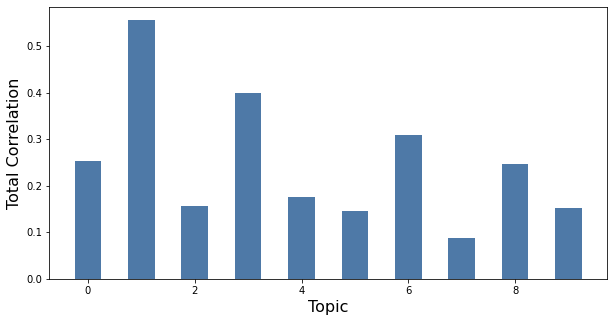

In [32]:
plt.figure(figsize=(10,5))
plt.bar(range(CorEx_exp_1.tcs.shape[0]), CorEx_exp_1.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation', fontsize=16);

In [33]:
#experiment (2)
CorEx_exp_2 = ct.Corex(n_hidden=15, words=words_tfidf,
                       max_iter=200, verbose=False, seed=1)

CorEx_exp_2.fit(X_TfidfVectorizer, words=words_tfidf, docs=df['content'], 
                anchors=[
    ['داعش', 'تنظيم', 'قتل'],
    ['فريق', 'ملعب', 'كره'],
    ['جامعه', 'طلاب', 'مدارس'],
    ['اسعار', 'سوق', 'مليار',  'نمو','نفط', 'خام'],
    ['خارجيه', 'وزراء', 'حكومه'],
    ['امطار', 'رياح' , 'حراره', 'هطول'],
    ['مرض', 'فيروس', 'علاج', 'سكر'],
    ['هاتف', 'اندرويد', 'ابل','ذكيه'],
    ['عيد', 'مهرج', 'مسرح', 'حفل', 'عروض', 'احتفال']], anchor_strength=5)

topics_exp_2 = CorEx_exp_2.get_topics()
for n,topic in enumerate(topics_exp_2):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: داعش,قتل,تنظيم,ارهاب,قوا,امن,هجوم,سوري,تفجير,ارهابيه
1: فريق,ملعب,كره,اعب,ناد,لاعب,مدرب,معسكر,لكر,اتحاد
2: جامعه,طلاب,مدارس,تعليم,جامع,قبول,معلم,تعليميه,والطالبا,لتعليم
3: اسعار,نفط,مليار,سوق,نمو,خام,مايه,اسهم,تراجع,موشر
4: وزراء,عدن,حوث,يمن,مقاومه,لاغاث,يمنيه,تحالف,انسانيه,خارجيه
5: امطار,حراره,رياح,هطول,انتخابيه,بلديه,ناخب,لانتخابا,سطحيه,انتخاب
6: مرض,علاج,فيروس,سكر,مستشف,صحيه,امراض,مريض,طبيه,صحه
7: ابل,اندرويد,هاتف,ذكيه,ايلاوف,مستكشف,لالبس,ابركرومب,اضرحه,استكشافيه
8: مهرج,مسرح,عيد,حفل,عروض,احتفال,عاليا,فعال,زوار,فطر
9: يندوز,هواتف,مستخدم,جيج,مايكروسوف,لمستخدم,تطبيق,جوجل,محموله,غوغل
10: بارتلي,يلوست,متنزه,ينطح,روهنج,متحدثه,ليطيح,نطح,ثير,والدب
11: فيلم,يلم,افلام,سينما,هوليود,اداير,بايرادا,سينماي,ديناصور,جوس
12: فكر,كتاب,دين,مسلم,لماذ,نفس,لان,كاتب,اسلام,عقل
13: حطام,طايره,ماليزيه,مخب,عثر,تهريب,ريوني,وينج,كاليه,مهاجر
14: كوكب,فضاء,لوت,شهب,ناس,قمر,كواكب,سطح,ميلنر,والفضاء


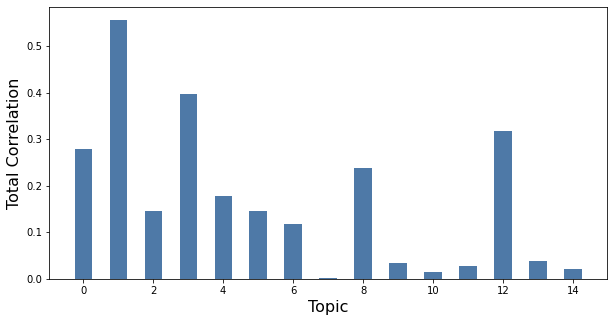

In [34]:
plt.figure(figsize=(10,5))
plt.bar(range(CorEx_exp_2.tcs.shape[0]), CorEx_exp_2.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation', fontsize=16);

In [35]:
#experiment (3)
CorEx_exp_3 = ct.Corex(n_hidden=10, words=words_tfidf,
                       max_iter=200, verbose=False, seed=1)

CorEx_exp_3.fit(X_TfidfVectorizer, words=words_tfidf, docs=df['content'], 
                anchors=[
    ['داعش', 'قتل'],
    ['فريق', 'كره'],
    ['جامعه', 'طلاب'],
    ['اسعار', 'سوق'],
    ['وزراء', 'حكومه'],
    ['رياح' , 'حراره'],
    ['مرض', 'علاج'],
    ['هاتف'],
    ['حفل']], anchor_strength=10)

topics_exp_3 = CorEx_exp_3.get_topics()
for n,topic in enumerate(topics_exp_3):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: داعش,قتل,ارهاب,تنظيم,قوا,هجوم,سوري,امن,مقتل,مقاتل
1: فريق,كره,اعب,ناد,لاعب,مدرب,معسكر,لكر,اتحاد,موسم
2: جامعه,طلاب,تعليم,انتخابيه,جامع,بلديه,مدارس,قبول,مرشح,ناخب
3: اسعار,سوق,مايه,نفط,اسهم,تراجع,مليار,موشر,دولار,ميه
4: وزراء,حكومه,عدن,يمن,حوث,مقاومه,لاغاث,يمنيه,تحالف,ملك
5: حراره,رياح,امطار,سطحيه,طقس,افقيه,لارصاد,هطول,كمساع,ارصاد
6: مرض,علاج,مستشف,صحيه,طبيه,مريض,طفله,صحه,امراض,فيروس
7: هاتف,هواتف,يندوز,مستخدم,اندرويد,ابل,جيج,ذكيه,كوكب,مايكروسوف
8: حفل,مهرج,عاليا,عيد,فعال,مسرح,عروض,زوار,فطر,حضور
9: فكر,كتاب,دين,مسلم,لماذ,نفس,اسلام,كاتب,لان,عقل


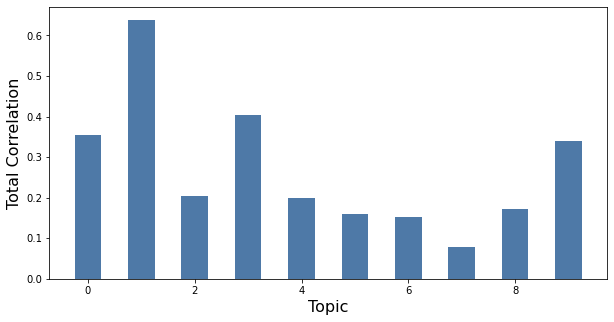

In [36]:
plt.figure(figsize=(10,5))
plt.bar(range(CorEx_exp_3.tcs.shape[0]), CorEx_exp_3.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation', fontsize=16);

In [37]:
#experiment (4)
CorEx_exp_4 = ct.Corex(n_hidden=10, words=words_tfidf,
                       max_iter=200, verbose=False, seed=1)

CorEx_exp_4.fit(X_TfidfVectorizer, words=words_tfidf, docs=df['content'], 
                anchors=[
    ['داعش', 'قتل'],
    ['فريق', 'كره'],
    ['جامعه', 'طلاب'],
    ['اسعار', 'سوق'],
    ['وزراء', 'حكومه'],
    ['مرض', 'علاج'],
    ['حفل']], anchor_strength=2)

topics_exp_4 = CorEx_exp_4.get_topics()
for n,topic in enumerate(topics_exp_4):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: شهداء,طوار,شهيد,مسجد,امن,تفجير,تعاز,استشهاد,ارهاب,يتغمد
1: فريق,اعب,ناد,لاعب,كره,مدرب,معسكر,لكر,اتحاد,موسم
2: فيلم,يلم,افلام,سينما,اندرس,سينماي,هوليود,اداير,بالمر,شمبانز
3: اسعار,سوق,مايه,نفط,اسهم,مليار,تراجع,موشر,دولار,ميه
4: حوث,ايران,عدن,يمن,مقاومه,تحالف,حكومه,جيش,قوا,حزب
5: حريق,مستشف,علاج,مرض,حادث,فرق,لاغ,اسعاف,طفله,باشر
6: مهرج,عاليا,انتخابيه,فعال,بلديه,مسرح,زوار,عروض,سياحيه,ناخب
7: هواتف,يندوز,هاتف,كوكب,اندرويد,مستخدم,ابل,فضاء,جيج,ذكيه
8: فكر,كتاب,دين,لماذ,مسلم,نفس,كاتب,لان,بعض,غير
9: تعليم,قبول,معلم,مدارس,جامع,تعليميه,متقدم,وظايف,دبلوم,مرشح


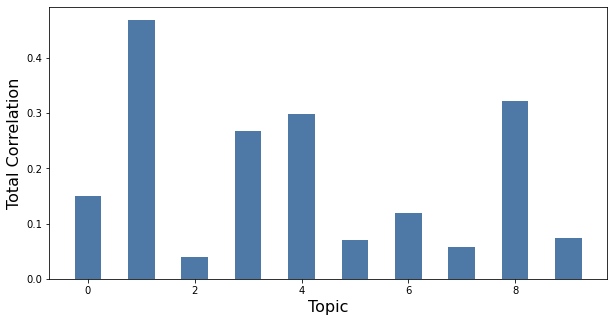

In [38]:
plt.figure(figsize=(10,5))
plt.bar(range(CorEx_exp_4.tcs.shape[0]), CorEx_exp_4.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation', fontsize=16);

In [39]:
#experiment (5)
CorEx_exp_5 = ct.Corex(n_hidden=10, words=words_tfidf,
                       max_iter=200, verbose=False, seed=1)

CorEx_exp_5.fit(X_TfidfVectorizer, words=words_tfidf, docs=df['content'], 
                anchors=[
    ['داعش', 'قتل'],
    ['فريق', 'كره'],
    ['جامعه', 'طلاب'],
    ['اسعار', 'سوق'],
    ['وزراء', 'حكومه'],
    ['مرض', 'علاج'],
    ['حفل']], anchor_strength=10)

topics_exp_5 = CorEx_exp_5.get_topics()
for n,topic in enumerate(topics_exp_5):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: داعش,قتل,تنظيم,هجوم,سوري,ارهاب,مقاتل,تركي,كردستان,مقتل
1: فريق,كره,اعب,ناد,لاعب,مدرب,معسكر,لكر,اتحاد,موسم
2: جامعه,طلاب,تعليم,انتخابيه,جامع,بلديه,مدارس,قبول,مرشح,ناخب
3: اسعار,سوق,مايه,نفط,اسهم,تراجع,مليار,موشر,دولار,ميه
4: وزراء,حكومه,عدن,حوث,يمن,مقاومه,لاغاث,يمنيه,تحالف,انسانيه
5: مرض,علاج,مستشف,طبيه,صحيه,طفله,مريض,امراض,فيروس,صحه
6: حفل,مهرج,عاليا,عيد,فعال,مسرح,تهان,عروض,فطر,زوار
7: امطار,رياح,سطحيه,حراره,طقس,افقيه,هطول,كمساع,لارصاد,غزير
8: فكر,كتاب,دين,لماذ,مسلم,كاتب,نفس,لان,بعض,غير
9: شهداء,شهيد,طوار,مسجد,استشهاد,تعاز,تفجير,امن,يتغمد,سمو


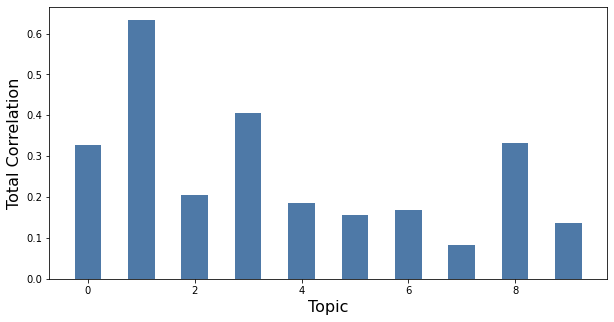

In [40]:
plt.figure(figsize=(10,5))
plt.bar(range(CorEx_exp_5.tcs.shape[0]), CorEx_exp_5.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation', fontsize=16);

### Topics prediction

In [41]:
predictions = pd.DataFrame(CorEx_exp_5.predict(X_TfidfVectorizer),index = df['content'], columns=['ارهاب',
                                                                                                    'رياضة',
                                                                                                    'تعليم',
                                                                                                    'مالية',
                                                                                                    'سياسية',
                                                                                                    'صحة',
                                                                                                    'ترفيه',
                                                                                                    'طقس',
                                                                                                    'ثقافه',
                                                                                                    'حرب'])

In [42]:
predictions.head(2)

,ارهاب,رياضة,تعليم,مالية,سياسية,صحة,ترفيه,طقس,ثقافه,حرب
content,,,,,,,,,,
"['حد', 'رييس', 'وزراء', 'بريطان', 'ديفيد', 'كامير', 'اثن', 'ملامح', 'استراتيج', 'لتصد', 'لتطرف', 'ريطاني', 'مسال', 'اعتبر', 'كامير', 'صراع', 'جيل', 'متعهد', 'خطاب', 'يرمنغهام', 'تصد', 'لهولاء', 'ينشر', 'تطرف', 'الشب', 'مسلم', 'بريطان', 'رسم', 'كامير', 'اطار', 'لاستراتيج', 'مكافح', 'تطرف', 'مقر', 'تنشر', 'كامل', 'لاحق', 'تسع', 'لتصد', 'لانتشار', 'افكار', 'متطرفه', 'يروج', 'متشد', 'تنظيم', 'داعش', 'حسبم', 'تناقل', 'سايل', 'اعلام', 'بريطانيه', 'خطه', 'رييس', 'وزراء', 'تكون', 'مد', 'خمس', 'اعوام', 'لقضاء', 'تطرف', 'داخل', 'اربع', 'محاور', 'قضاء', 'ايديولوج', 'تطرف', 'والوقوف', 'عمليا', 'تجنيد', 'غسل', 'ادمغه', 'افكار', 'متطرفه', 'واعاد', 'اصوا', 'اسلام', 'معتدل', 'بريطان', 'والتعامل', 'ازما', 'هويه', 'يواج', 'مسلم', 'مولود', 'ريطاني', 'سيك', 'اهداف', 'رييسيه', 'لاستراتيج', 'مكافح', 'صعود', 'يطلق', 'علي', 'اسم', 'متطرف', 'داخل', 'امر', 'كامير', 'عمل', 'فهم', 'اسباب', 'تجتذب', 'لداعش', 'والتصد', 'كامير', 'سياق', 'خطاب', 'تسع', 'مجموعا', 'متطرف', 'داعش', 'لحشد', 'شباب', 'لقضي', 'مسمومه', 'فان', 'تمنح', 'احساس', 'انتماء', 'ربم', 'يفتقر', 'داخل', 'واستطرد', 'قول', 'يجعل', 'عرض', 'لتطرف', 'رييس', 'وزراء', 'بريطان', 'بريطان', 'مجتمع', 'ديمقراط', 'متعد', 'اعراق', 'والادي', 'مضيف', 'يحتو', 'مواط', 'ونو', 'بان', 'يعمل', 'مسلم', 'لمحارب', 'افكار', 'تطرف', 'تضمن', 'استراتيج', 'حكومه', 'بريطانيه', 'مقترحا', 'لقضاء', 'تطرف', 'محاور', 'اربعه', 'مشار', 'يها', 'اعل', 'واهم', 'اعطاء', 'صلاحيه', 'لاهال', 'يبدون', 'قابل', 'سفر', 'سوري', 'باتلاف', 'جوازا', 'سفر', 'تحفيز', 'زياد', 'اندماج', 'مدارس', 'والتطرق', 'لتجنيد', 'والتطرف', 'السج', 'شبك', 'انترنت', 'رصد', 'قنو', 'تبث', 'رسايل', 'متطرف', 'حظر', 'زياد', 'صلاحيا', 'حكومه', 'توقيف', 'جماعا', 'تنشر', 'فكر', 'متطرف', 'تحاول', 'تجنيد', 'والاستثمار', 'جمعيا', 'تحارب', 'فكر', 'متطرف', 'طريق', 'نشر', 'اسلام', 'متعدل', 'تاسيس', 'منتد', 'تفاعل', 'لمخاطب', 'ظاهر', 'تطرف', 'وانتشار', 'ريطاني', 'واعاد', 'هيكل', 'توزيع', 'سكن', 'لتفاد', 'عزل', 'انفصال', 'مسلم', 'احياء', 'تشجيع', 'جامعا', 'لاستضاف', 'ندوا', 'مناهض', 'لتطرف', 'غير', 'تصريحا', 'احد', 'كامير', 'يريد', 'تبذل', 'ريطاني', 'مزيد', 'جهود', 'لمساعد', 'ولا', 'تدمير', 'تنظيم', 'داعش', 'تقول', 'حكومه', 'كامير', 'متوقع', 'يسع', 'لحصول', 'موافق', 'برلم', 'لمد', 'مهما', 'قصف', 'تنظيم', 'سوري', 'ليس', 'معاقل', 'عراق', 'يذكر', 'ريط', 'سافر', 'سوري', 'والعراق', 'لانضمام', 'لتنظيم', 'داعش', 'متطرف', 'كمارفع', 'ريطاني', 'تاهب', 'لخطر', 'اعل', 'مستويا', 'يشير', 'جهوز', 'لاحتمال', 'قوع', 'هجوم', 'مرتفع', 'لغا']",True,False,False,False,False,False,False,False,False,False
"['اصدر', 'رييس', 'عبدرب', 'منصور', 'هاد', 'رييس', 'جمهوريه', 'يمنيه', 'اثن', 'قرار', 'جمهوري', 'تعين', 'نايف', 'بكر', 'محافظ', 'لعد', 'انتصار', 'حقت', 'قوا', 'مقاومه', 'شعبيه', 'طرد', 'متمرد', 'حوث', 'نايف', 'بكر', 'شغل', 'منصب', 'كيل', 'محافظ', 'عدن', 'لشوون', 'مدير', 'وله', 'علاقا', 'جيد', 'القو', 'سياسيه', 'يعتبر', 'رجل', 'اعل', 'بدر', 'باسمل', 'نقل', 'يمن', 'اعداد', 'خطه', 'طوار', 'لمدين', 'موكد', 'اولو', 'حكومه', 'تشغيل', 'موان', 'تحس', 'موضح', 'ريق', 'فني', 'متخص', 'وصل', 'امار', 'لاعاد', 'تشغيل', 'مطار', 'اربع', 'عشر', 'ساع', 'واستيناف', 'رحل', 'وال', 'عدن', 'ساع', 'مقبله', 'داعي', 'منظم', 'حقوقيه', 'والاعلام', 'لقدوم', 'عدن', 'لرصد', 'ماس', 'ارتكب', 'متمرد', 'موكد', 'حكومه', 'ستوم', 'رحلا', 'مطار', 'جانب', 'متحدث', 'رسم', 'حكومه', 'يمنيه', 'راجح', 'باد', 'حجم', 'دمار', 'عدن', 'يكن', 'متوقع', 'سيم', 'طال', 'البن', 'تحتيه', 'مطار', 'عدن', 'سبيل', 'مثال', 'مدمر', 'كامل', 'محطا', 'توليد', 'كهرباء', 'والمنشا', 'نفطيه', 'تعرض', 'مره', 'لقصف', 'حوث', 'كان', 'حين', 'يريد', 'ضغط', 'مقاومه', 'شعبيه', 'منع', 'حصول', 'محروق', 'ينجح', 'مبي', 'يحتاج', 'اعاد', 'تاهيل', 'لمبالغ', 'واشهر']",False,False,False,False,True,False,False,False,False,False


### Topic probability

In [43]:
probabilities = pd.DataFrame(CorEx_exp_5.p_y_given_x,
             index = df['content'],
             columns = ['ارهاب',
                        'رياضة',
                        'تعليم',
                        'مالية',
                        'سياسية',
                        'صحة',
                        'ترفيه',
                        'طقس',
                        'ثقافه',
                        'حرب']
                )


In [44]:
probabilities.head(3)

,ارهاب,رياضة,تعليم,مالية,سياسية,صحة,ترفيه,طقس,ثقافه,حرب
content,,,,,,,,,,
"['حد', 'رييس', 'وزراء', 'بريطان', 'ديفيد', 'كامير', 'اثن', 'ملامح', 'استراتيج', 'لتصد', 'لتطرف', 'ريطاني', 'مسال', 'اعتبر', 'كامير', 'صراع', 'جيل', 'متعهد', 'خطاب', 'يرمنغهام', 'تصد', 'لهولاء', 'ينشر', 'تطرف', 'الشب', 'مسلم', 'بريطان', 'رسم', 'كامير', 'اطار', 'لاستراتيج', 'مكافح', 'تطرف', 'مقر', 'تنشر', 'كامل', 'لاحق', 'تسع', 'لتصد', 'لانتشار', 'افكار', 'متطرفه', 'يروج', 'متشد', 'تنظيم', 'داعش', 'حسبم', 'تناقل', 'سايل', 'اعلام', 'بريطانيه', 'خطه', 'رييس', 'وزراء', 'تكون', 'مد', 'خمس', 'اعوام', 'لقضاء', 'تطرف', 'داخل', 'اربع', 'محاور', 'قضاء', 'ايديولوج', 'تطرف', 'والوقوف', 'عمليا', 'تجنيد', 'غسل', 'ادمغه', 'افكار', 'متطرفه', 'واعاد', 'اصوا', 'اسلام', 'معتدل', 'بريطان', 'والتعامل', 'ازما', 'هويه', 'يواج', 'مسلم', 'مولود', 'ريطاني', 'سيك', 'اهداف', 'رييسيه', 'لاستراتيج', 'مكافح', 'صعود', 'يطلق', 'علي', 'اسم', 'متطرف', 'داخل', 'امر', 'كامير', 'عمل', 'فهم', 'اسباب', 'تجتذب', 'لداعش', 'والتصد', 'كامير', 'سياق', 'خطاب', 'تسع', 'مجموعا', 'متطرف', 'داعش', 'لحشد', 'شباب', 'لقضي', 'مسمومه', 'فان', 'تمنح', 'احساس', 'انتماء', 'ربم', 'يفتقر', 'داخل', 'واستطرد', 'قول', 'يجعل', 'عرض', 'لتطرف', 'رييس', 'وزراء', 'بريطان', 'بريطان', 'مجتمع', 'ديمقراط', 'متعد', 'اعراق', 'والادي', 'مضيف', 'يحتو', 'مواط', 'ونو', 'بان', 'يعمل', 'مسلم', 'لمحارب', 'افكار', 'تطرف', 'تضمن', 'استراتيج', 'حكومه', 'بريطانيه', 'مقترحا', 'لقضاء', 'تطرف', 'محاور', 'اربعه', 'مشار', 'يها', 'اعل', 'واهم', 'اعطاء', 'صلاحيه', 'لاهال', 'يبدون', 'قابل', 'سفر', 'سوري', 'باتلاف', 'جوازا', 'سفر', 'تحفيز', 'زياد', 'اندماج', 'مدارس', 'والتطرق', 'لتجنيد', 'والتطرف', 'السج', 'شبك', 'انترنت', 'رصد', 'قنو', 'تبث', 'رسايل', 'متطرف', 'حظر', 'زياد', 'صلاحيا', 'حكومه', 'توقيف', 'جماعا', 'تنشر', 'فكر', 'متطرف', 'تحاول', 'تجنيد', 'والاستثمار', 'جمعيا', 'تحارب', 'فكر', 'متطرف', 'طريق', 'نشر', 'اسلام', 'متعدل', 'تاسيس', 'منتد', 'تفاعل', 'لمخاطب', 'ظاهر', 'تطرف', 'وانتشار', 'ريطاني', 'واعاد', 'هيكل', 'توزيع', 'سكن', 'لتفاد', 'عزل', 'انفصال', 'مسلم', 'احياء', 'تشجيع', 'جامعا', 'لاستضاف', 'ندوا', 'مناهض', 'لتطرف', 'غير', 'تصريحا', 'احد', 'كامير', 'يريد', 'تبذل', 'ريطاني', 'مزيد', 'جهود', 'لمساعد', 'ولا', 'تدمير', 'تنظيم', 'داعش', 'تقول', 'حكومه', 'كامير', 'متوقع', 'يسع', 'لحصول', 'موافق', 'برلم', 'لمد', 'مهما', 'قصف', 'تنظيم', 'سوري', 'ليس', 'معاقل', 'عراق', 'يذكر', 'ريط', 'سافر', 'سوري', 'والعراق', 'لانضمام', 'لتنظيم', 'داعش', 'متطرف', 'كمارفع', 'ريطاني', 'تاهب', 'لخطر', 'اعل', 'مستويا', 'يشير', 'جهوز', 'لاحتمال', 'قوع', 'هجوم', 'مرتفع', 'لغا']",0.990068,0.000175,0.003247,0.001795,0.188163,0.003997,0.007353,0.001631,0.387920,0.001420
"['اصدر', 'رييس', 'عبدرب', 'منصور', 'هاد', 'رييس', 'جمهوريه', 'يمنيه', 'اثن', 'قرار', 'جمهوري', 'تعين', 'نايف', 'بكر', 'محافظ', 'لعد', 'انتصار', 'حقت', 'قوا', 'مقاومه', 'شعبيه', 'طرد', 'متمرد', 'حوث', 'نايف', 'بكر', 'شغل', 'منصب', 'كيل', 'محافظ', 'عدن', 'لشوون', 'مدير', 'وله', 'علاقا', 'جيد', 'القو', 'سياسيه', 'يعتبر', 'رجل', 'اعل', 'بدر', 'باسمل', 'نقل', 'يمن', 'اعداد', 'خطه', 'طوار', 'لمدين', 'موكد', 'اولو', 'حكومه', 'تشغيل', 'موان', 'تحس', 'موضح', 'ريق', 'فني', 'متخص', 'وصل', 'امار', 'لاعاد', 'تشغيل', 'مطار', 'اربع', 'عشر', 'ساع', 'واستيناف', 'رحل', 'وال', 'عدن', 'ساع', 'مقبله', 'داعي', 'منظم', 'حقوقيه', 'والاعلام', 'لقدوم', 'عدن', 'لرصد', 'ماس', 'ارتكب', 'متمرد', 'موكد', 'حكومه', 'ستوم', 'رحلا', 'مطار', 'جانب', 'متحدث', 'رسم', 'حكومه', 'يمنيه', 'راجح', 'باد', 'حجم', 'دمار', 'عدن', 'يكن', 'متوقع', 'سيم', 'طال', 'البن', 'تحتيه', 'مطار', 'عدن', 'سبيل', 'مثال', 'مدمر', 'كامل', 'محطا', 'توليد', 'كهرباء', 'والمنشا', 'نفطيه', 'تعرض', 'مره', 'لقصف', 'حوث', 'كان', 'حين', 'يريد', 'ضغط', 'مقاومه', 'شعبيه', 'منع', 'حصول', 'محروق', 'ينجح', 'مبي', 'يحتاج', 'اعاد', 'تاهيل', 'لمبالغ', 'واشهر']",0.004767,0.000535,0.001063,0.004724,0.999852,0.004020,0.005458,0.001274,0.005740,0.002370
"['وافق', 'امن', 'اثن', 'اتفاق', 'يحد', 'رنامج', 'ايران', 'النو', 'مقابل', 'تخفيف', 'عقوب', 'طهران', 'يكون', 'بامك', 'معاود', 'فرض', 'عقوبا', 'الام', 'عقد', 'انتهك', 'ايران', 'اتفاق', 'تاريخ', 'وافق', 'مجلس', 'مولف', 'دول', 'قرار'

In [45]:
def predLabel(x):
    if x.max() > 0.25:
        return x.idxmax() 
    else: 
        return 'أخرى'

In [46]:
probabilities['تصنيف الخبر'] = probabilities.apply(predLabel, axis=1)
probabilities.head(10)

,ارهاب,رياضة,تعليم,مالية,سياسية,صحة,ترفيه,طقس,ثقافه,حرب,تصنيف الخبر
content,,,,,,,,,,,
"['حد', 'رييس', 'وزراء', 'بريطان', 'ديفيد', 'كامير', 'اثن', 'ملامح', 'استراتيج', 'لتصد', 'لتطرف', 'ريطاني', 'مسال', 'اعتبر', 'كامير', 'صراع', 'جيل', 'متعهد', 'خطاب', 'يرمنغهام', 'تصد', 'لهولاء', 'ينشر', 'تطرف', 'الشب', 'مسلم', 'بريطان', 'رسم', 'كامير', 'اطار', 'لاستراتيج', 'مكافح', 'تطرف', 'مقر', 'تنشر', 'كامل', 'لاحق', 'تسع', 'لتصد', 'لانتشار', 'افكار', 'متطرفه', 'يروج', 'متشد', 'تنظيم', 'داعش', 'حسبم', 'تناقل', 'سايل', 'اعلام', 'بريطانيه', 'خطه', 'رييس', 'وزراء', 'تكون', 'مد', 'خمس', 'اعوام', 'لقضاء', 'تطرف', 'داخل', 'اربع', 'محاور', 'قضاء', 'ايديولوج', 'تطرف', 'والوقوف', 'عمليا', 'تجنيد', 'غسل', 'ادمغه', 'افكار', 'متطرفه', 'واعاد', 'اصوا', 'اسلام', 'معتدل', 'بريطان', 'والتعامل', 'ازما', 'هويه', 'يواج', 'مسلم', 'مولود', 'ريطاني', 'سيك', 'اهداف', 'رييسيه', 'لاستراتيج', 'مكافح', 'صعود', 'يطلق', 'علي', 'اسم', 'متطرف', 'داخل', 'امر', 'كامير', 'عمل', 'فهم', 'اسباب', 'تجتذب', 'لداعش', 'والتصد', 'كامير', 'سياق', 'خطاب', 'تسع', 'مجموعا', 'متطرف', 'داعش', 'لحشد', 'شباب', 'لقضي', 'مسمومه', 'فان', 'تمنح', 'احساس', 'انتماء', 'ربم', 'يفتقر', 'داخل', 'واستطرد', 'قول', 'يجعل', 'عرض', 'لتطرف', 'رييس', 'وزراء', 'بريطان', 'بريطان', 'مجتمع', 'ديمقراط', 'متعد', 'اعراق', 'والادي', 'مضيف', 'يحتو', 'مواط', 'ونو', 'بان', 'يعمل', 'مسلم', 'لمحارب', 'افكار', 'تطرف', 'تضمن', 'استراتيج', 'حكومه', 'بريطانيه', 'مقترحا', 'لقضاء', 'تطرف', 'محاور', 'اربعه', 'مشار', 'يها', 'اعل', 'واهم', 'اعطاء', 'صلاحيه', 'لاهال', 'يبدون', 'قابل', 'سفر', 'سوري', 'باتلاف', 'جوازا', 'سفر', 'تحفيز', 'زياد', 'اندماج', 'مدارس', 'والتطرق', 'لتجنيد', 'والتطرف', 'السج', 'شبك', 'انترنت', 'رصد', 'قنو', 'تبث', 'رسايل', 'متطرف', 'حظر', 'زياد', 'صلاحيا', 'حكومه', 'توقيف', 'جماعا', 'تنشر', 'فكر', 'متطرف', 'تحاول', 'تجنيد', 'والاستثمار', 'جمعيا', 'تحارب', 'فكر', 'متطرف', 'طريق', 'نشر', 'اسلام', 'متعدل', 'تاسيس', 'منتد', 'تفاعل', 'لمخاطب', 'ظاهر', 'تطرف', 'وانتشار', 'ريطاني', 'واعاد', 'هيكل', 'توزيع', 'سكن', 'لتفاد', 'عزل', 'انفصال', 'مسلم', 'احياء', 'تشجيع', 'جامعا', 'لاستضاف', 'ندوا', 'مناهض', 'لتطرف', 'غير', 'تصريحا', 'احد', 'كامير', 'يريد', 'تبذل', 'ريطاني', 'مزيد', 'جهود', 'لمساعد', 'ولا', 'تدمير', 'تنظيم', 'داعش', 'تقول', 'حكومه', 'كامير', 'متوقع', 'يسع', 'لحصول', 'موافق', 'برلم', 'لمد', 'مهما', 'قصف', 'تنظيم', 'سوري', 'ليس', 'معاقل', 'عراق', 'يذكر', 'ريط', 'سافر', 'سوري', 'والعراق', 'لانضمام', 'لتنظيم', 'داعش', 'متطرف', 'كمارفع', 'ريطاني', 'تاهب', 'لخطر', 'اعل', 'مستويا', 'يشير', 'جهوز', 'لاحتمال', 'قوع', 'هجوم', 'مرتفع', 'لغا']",0.990068,0.000175,0.003247,0.001795,0.188163,0.003997,0.007353,0.001631,0.387920,0.001420,ارهاب
"['اصدر', 'رييس', 'عبدرب', 'منصور', 'هاد', 'رييس', 'جمهوريه', 'يمنيه', 'اثن', 'قرار', 'جمهوري', 'تعين', 'نايف', 'بكر', 'محافظ', 'لعد', 'انتصار', 'حقت', 'قوا', 'مقاومه', 'شعبيه', 'طرد', 'متمرد', 'حوث', 'نايف', 'بكر', 'شغل', 'منصب', 'كيل', 'محافظ', 'عدن', 'لشوون', 'مدير', 'وله', 'علاقا', 'جيد', 'القو', 'سياسيه', 'يعتبر', 'رجل', 'اعل', 'بدر', 'باسمل', 'نقل', 'يمن', 'اعداد', 'خطه', 'طوار', 'لمدين', 'موكد', 'اولو', 'حكومه', 'تشغيل', 'موان', 'تحس', 'موضح', 'ريق', 'فني', 'متخص', 'وصل', 'امار', 'لاعاد', 'تشغيل', 'مطار', 'اربع', 'عشر', 'ساع', 'واستيناف', 'رحل', 'وال', 'عدن', 'ساع', 'مقبله', 'داعي', 'منظم', 'حقوقيه', 'والاعلام', 'لقدوم', 'عدن', 'لرصد', 'ماس', 'ارتكب', 'متمرد', 'موكد', 'حكومه', 'ستوم', 'رحلا', 'مطار', 'جانب', 'متحدث', 'رسم', 'حكومه', 'يمنيه', 'راجح', 'باد', 'حجم', 'دمار', 'عدن', 'يكن', 'متوقع', 'سيم', 'طال', 'البن', 'تحتيه', 'مطار', 'عدن', 'سبيل', 'مثال', 'مدمر', 'كامل', 'محطا', 'توليد', 'كهرباء', 'والمنشا', 'نفطيه', 'تعرض', 'مره', 'لقصف', 'حوث', 'كان', 'حين', 'يريد', 'ضغط', 'مقاومه', 'شعبيه', 'منع', 'حصول', 'محروق', 'ينجح', 'مبي', 'يحتاج', 'اعاد', 'تاهيل', 'لمبالغ', 'واشهر']",0.004767,0.000535,0.001063,0.004724,0.999852,0.004020,0.005458,0.001274,0.005740,0.002370,سياسية
"['وافق', 'امن', 'اثن', 'اتفاق', 'يحد', 'رنامج', 'ايران', 'النو', 'مقابل', 'تخفيف', 'عقوب', 'طهران', 'يكون', 'بامك', 'معاود', 'فرض', 'عقوبا', 'الام', 'عقد', 'انتهك', 'ايران', 'اتفاق', 'تاريخ', 'وافق', 'مج

In [47]:
len(probabilities[probabilities['تصنيف الخبر']=='أخرى'])

7072

In [48]:
probabilities.shape

(25617, 11)

In [53]:
probabilities=probabilities.reset_index()
probabilities.head()

,content,ارهاب,رياضة,تعليم,مالية,سياسية,صحة,ترفيه,طقس,ثقافه,حرب,تصنيف الخبر
0,"['حد', 'رييس', 'وزراء', 'بريطان', 'ديفيد', 'كا...",0.990068,0.000175,0.003247,0.001795,0.188163,0.003997,0.007353,0.001631,0.387920,0.001420,ارهاب
1,"['اصدر', 'رييس', 'عبدرب', 'منصور', 'هاد', 'ريي...",0.004767,0.000535,0.001063,0.004724,0.999852,0.004020,0.005458,0.001274,0.005740,0.002370,سياسية
2,"['وافق', 'امن', 'اثن', 'اتفاق', 'يحد', 'رنامج'...",0.002324,0.000045,0.001439,0.001375,0.002067,0.002006,0.000263,0.001722,0.007687,0.001884,أخرى
3,"['مسوول', 'افغان', 'جندي', 'افغاني', 'قتل', 'ح...",0.999999,0.001665,0.002085,0.001640,0.001812,0.003994,0.007165,0.001040,0.004369,0.001804,ارهاب
4,"['اعلن', 'خارجيه', 'ايطاليه', 'اثن', 'اربع', '...",0.043440,0.004731,0.001086,0.001476,0.001661,0.003589,0.003287,0.001251,0.006973,0.000874,أخرى


In [54]:
myPredict = probabilities['تصنيف الخبر']
myPredict

0         ارهاب
1        سياسية
2          أخرى
3         ارهاب
4          أخرى
          ...  
25612     ثقافه
25613      أخرى
25614      أخرى
25615     تعليم
25616     ترفيه
Name: تصنيف الخبر, Length: 25617, dtype: object